In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.insert(0, r'C:\Users\Admin\Documents\before_github\SymSC_Python_Norm2')
from Objects import JJ, Sine_current, Pulses, L,Ib, Square_pulse, DC_SFQ_1,MutualInductance, C
from FunctionCompiler import *

# Unipolar

![jupyter](./Bipolar_SFQ_Generator.png)

Generated objects are: Sine_current1 C1 C2 Ib1 Ib2 C3 JJ1 DC_SFQ1_J1 DC_SFQ1_J2 DC_SFQ1_J3 DC_SFQ1_J4 DC_SFQ1_L2 DC_SFQ1_L8 DC_SFQ1_L4 DC_SFQ1_Lp3 DC_SFQ1_L5 DC_SFQ1_Lp2 DC_SFQ1_L10 DC_SFQ1_L6 DC_SFQ1_Lp11 DC_SFQ1_L13 DC_SFQ1_Lp4 DC_SFQ1_L15 DC_SFQ2_J1 DC_SFQ2_J2 DC_SFQ2_J3 DC_SFQ2_J4 DC_SFQ2_L2 DC_SFQ2_L8 DC_SFQ2_L4 DC_SFQ2_Lp3 DC_SFQ2_L5 DC_SFQ2_Lp2 DC_SFQ2_L10 DC_SFQ2_L6 DC_SFQ2_Lp11 DC_SFQ2_L13 DC_SFQ2_Lp4 DC_SFQ2_L15


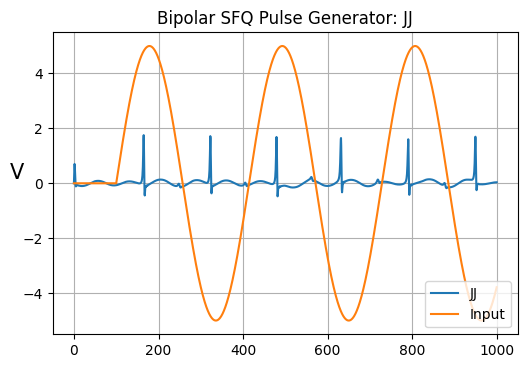

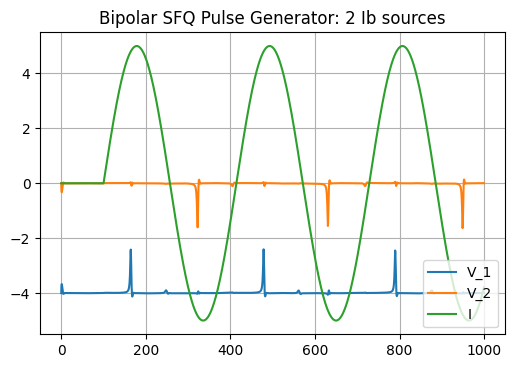

In [14]:
import numpy as np
from matplotlib import pyplot as plt

from Objects import C, JJ, Sine_current, DC_SFQ_1, Pulses, L, Ib, DC_SFQ, R
from FunctionCompiler import *

C_c = 10


dc_sfq_1 = DC_SFQ_1.DC_SFQ_1(loc=[1,6,2])
dc_sfq_2 = DC_SFQ_1.DC_SFQ_1(loc=[1,7,3])

C1 = C.C(loc=[2,4],c=2*C_c)
C2 = C.C(loc=[3,5],c=2*C_c)

C_Q = C.C(loc=[4,5],c=0.01)
JJ1 = JJ.JJ(loc=[4,5],A=0.1,c=0.1)

Ib1 = Ib.Ib(loc=[6], val=3)
Ib2 = Ib.Ib(loc=[7], val=-3)


pulse_1 = Sine_current.Sine_current(loc=[1], A = 5, t0 = 100,w=0.02,length=20000)

t = np.arange(0, 1000, 0.5)
fc = FunctionCompiler([ pulse_1, C1, C2,Ib1, Ib2, dc_sfq_1, dc_sfq_2, C_Q, JJ1],t)

sol = fc.solve()
#fc.object_dict

V_1 = fc.object_dict['DC_SFQ1_J4'].get_data("V",t,sol);
V_2 = fc.object_dict['DC_SFQ2_J4'].get_data("V",t,sol);

V_JJ = JJ1.get_data("V",t,sol);
I_JJ = JJ1.get_data("I",t,sol)
V_C_Q = C_Q.get_data("V",t,sol)

fig, ax = plt.subplots(dpi=100)

ax.plot(t, V_JJ)
ax.grid('on')
plt.ylabel('V',rotation=0,fontsize=15)
plt.title('Bipolar SFQ Pulse Generator: JJ')
#ax.plot(t, V_JJ+4)
ax.plot(t,pulse_1.get_data("I",t,sol))
ax.legend(['JJ','Input'], loc='lower right')

fig, ax = plt.subplots(dpi=100)

ax.plot(t, V_1-4)

ax.plot(t, V_2)
ax.grid('on')
plt.title('Bipolar SFQ Pulse Generator: 2 Ib sources')
#ax.plot(t, V_JJ+4)
ax.plot(t,pulse_1.get_data("I",t,sol))
ax.legend(['V_1','V_2','I'], loc='lower right')

# Bipolar with ERSFQ

![jupyter](./Bipolar_SFQ_Generator_var_2_ERSFQ.png)

In [30]:
C_c = 10

mutual = MutualInductance.MutualInductance(loc=[1,0,2,3],L1 = 2, L2 = 2, k=5)

dc_sfq_1 = DC_SFQ_1.DC_SFQ_1(loc=[2,8,4])
dc_sfq_2 = DC_SFQ_1.DC_SFQ_1(loc=[3,9,5])

C1 = C.C(loc=[4,6],c=2*C_c)
C2 = C.C(loc=[5,7],c=2*C_c)

C_Q = C.C(loc=[6,7],c=0.01)
JJ1 = JJ.JJ(loc=[6,7],A=0.1,c=0.1)

J1 = JJ.JJ(loc=[8,10],A=10,c=1)
J2 = JJ.JJ(loc=[9,11],A=10,c=1)

L1 = L.L(loc=[10,12],val=1)
L2 = L.L(loc=[11,12],val=1)

Current_source = Ib.Ib(loc=[12],val=3)
pulse_1 = Sine_current.Sine_current(loc=[1], A = 3.75, t0 = 100, w=0.02, length=20000)

t = np.arange(0, 2000, 0.5)
fc = FunctionCompiler([L1, L2, Current_source, pulse_1, mutual, C1, C2, dc_sfq_1, dc_sfq_2, C_Q, JJ1, J1, J2],t)

sol = fc.solve()
#fc.object_dict

Generated objects are: L1 L2 Ib1 Sine_current1 MutualInductance1 C1 C2 C3 JJ1 JJ2 JJ3 DC_SFQ1_J1 DC_SFQ1_J2 DC_SFQ1_J3 DC_SFQ1_J4 DC_SFQ1_L2 DC_SFQ1_L8 DC_SFQ1_L4 DC_SFQ1_Lp3 DC_SFQ1_L5 DC_SFQ1_Lp2 DC_SFQ1_L10 DC_SFQ1_L6 DC_SFQ1_Lp11 DC_SFQ1_L13 DC_SFQ1_Lp4 DC_SFQ1_L15 DC_SFQ2_J1 DC_SFQ2_J2 DC_SFQ2_J3 DC_SFQ2_J4 DC_SFQ2_L2 DC_SFQ2_L8 DC_SFQ2_L4 DC_SFQ2_Lp3 DC_SFQ2_L5 DC_SFQ2_Lp2 DC_SFQ2_L10 DC_SFQ2_L6 DC_SFQ2_Lp11 DC_SFQ2_L13 DC_SFQ2_Lp4 DC_SFQ2_L15


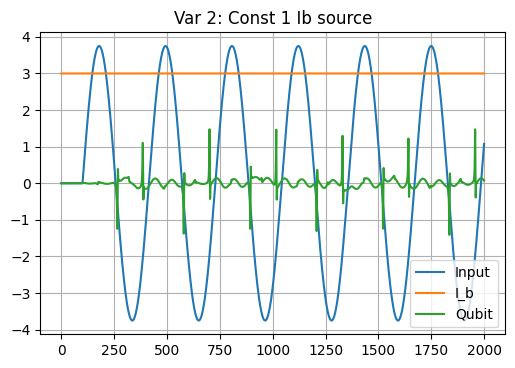

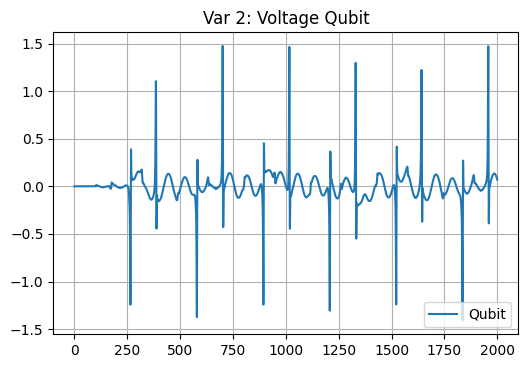

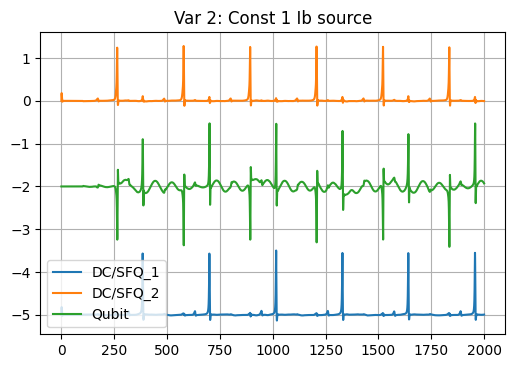

In [33]:
V_1 = fc.object_dict['DC_SFQ1_J4'].get_data("V",t,sol);
V_2 = fc.object_dict['DC_SFQ2_J4'].get_data("V",t,sol);
Input_V = mutual.get_data("V1",t,sol);
Input =pulse_1.get_data("I",t,sol)
V_JJ = JJ1.get_data("V",t,sol);

fig, ax = plt.subplots(dpi=100)

ax.grid('on')
plt.title('Var 2: Const 1 Ib source')
#ax.plot(t, V_JJ+4)
ax.plot(t,Input)
ax.plot(t, Current_source.get_data("I",t,sol))
ax.plot(t, V_JJ)
#ax.plot(t,fc.object_dict['MutualInductance1'].get_data("I2",t,sol))
ax.legend(['Input','I_b','Qubit'], loc='lower right')


fig, ax = plt.subplots(dpi=100)

ax.plot(t, V_JJ)
ax.grid('on')
plt.title('Var 2: Voltage Qubit')
#ax.plot(t, V_JJ+4)
#ax.plot(t,Input)
#ax.plot(t,fc.object_dict['MutualInductance1'].get_data("I2",t,sol))
ax.legend(['Qubit','Input'], loc='lower right')

fig, ax = plt.subplots(dpi=100)

ax.plot(t, V_1-5)
ax.plot(t, V_2)
ax.grid('on')
plt.title('Var 2: Const 1 Ib source')
#ax.plot(t,Input)
ax.plot(t,V_JJ-2)
ax.legend(['DC/SFQ_1','DC/SFQ_2','Qubit'], loc='lower left')

# New JTL

![jupyter](./New_JTL_add.png)

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.insert(0, r'C:\Users\Admin\Documents\before_github\SymSC_Python_Norm2')

from Objects import JJ, Sine_current, Pulses, L,Ib, Square_pulse, R
from FunctionCompiler import *

### example with 10 JJ, 11 L

In [3]:
i_val=1

JJ_1 = JJ.JJ(loc=[1,0],A=1,c=1)
JJ_2 = JJ.JJ(loc=[3,0],A=i_val,c=1)
JJ_3 = JJ.JJ(loc=[4,0],A=i_val,c=1)
JJ_4 = JJ.JJ(loc=[5,0],A=i_val,c=1)
JJ_5 = JJ.JJ(loc=[6,0],A=i_val,c=1)
JJ_6 = JJ.JJ(loc=[7,0],A=i_val,c=1)
JJ_7 = JJ.JJ(loc=[8,0],A=i_val,c=1)
JJ_8 = JJ.JJ(loc=[9,0],A=i_val,c=1)
JJ_9 = JJ.JJ(loc=[10,0],A=i_val,c=1)
JJ_10 = JJ.JJ(loc=[12,0],A=1,c=1)

i_in = 2

l_val=np.pi/i_in
L_1 = L.L(loc=[1,2],val=l_val)
L_2 = L.L(loc=[2,3],val=l_val)
L_3 = L.L(loc=[3,4],val=l_val)
L_4 = L.L(loc=[4,5],val=l_val)
L_5 = L.L(loc=[5,6],val=l_val)
L_6 = L.L(loc=[6,7],val=l_val)
L_7 = L.L(loc=[7,8],val=l_val)
L_8 = L.L(loc=[8,9],val=l_val)
L_9 = L.L(loc=[9,10],val=l_val)
L_10 = L.L(loc=[10,11],val=l_val)
L_11 = L.L(loc=[11,12],val=l_val)

R_out = R.R(loc=[11,0],r=1)

a=1
Ib1 = Ib.Ib(loc=[1], val=a)
Ib2 = Ib.Ib(loc=[3], val=-2*a)
Ib3 = Ib.Ib(loc=[4], val=2*a)
Ib4 = Ib.Ib(loc=[5], val=-2*a)
Ib5 = Ib.Ib(loc=[6], val=2*a)
Ib6 = Ib.Ib(loc=[7], val=-2*a)
Ib7 = Ib.Ib(loc=[8], val=2*a)
Ib8 = Ib.Ib(loc=[9], val=-2*a)
Ib9 = Ib.Ib(loc=[10], val=2*a)
Ib10 = Ib.Ib(loc=[12], val=-a)


I_input = Sine_current.Sine_current(loc=[2], A = i_in, t0 = 50, w=0.05, length=2000)


t = np.arange(0, 600, 0.5)
#fc = FunctionCompiler([ JJ_1, JJ_2, JJ_3, JJ_4, JJ_5, JJ_6, L_1, L_2, L_3, L_4, L_5, L_6, L_7, Ib1, Ib2, Ib3, Ib4, Ib5, Ib6, I_input],t)
fc = FunctionCompiler([JJ_1, JJ_2, JJ_3, JJ_4, JJ_5,JJ_6,JJ_7, JJ_8, JJ_9, JJ_10, L_1, L_2, L_3, L_4, L_5,L_6, L_7,L_8, L_9, L_10, L_11, R_out,Ib1, Ib2, Ib3, Ib4, Ib5, Ib6,Ib7, Ib8, Ib9, Ib10,I_input],t)

sol = fc.solve()

V_JJ1 = JJ_1.get_data("V",t,sol);
V_JJ2 = JJ_2.get_data("V",t,sol);
Input = I_input.get_data("I",t,sol);
V_JJ3 = JJ_3.get_data("V",t,sol);
V_JJ4 = JJ_4.get_data("V",t,sol);
V_JJ5 = JJ_5.get_data("V",t,sol);
V_out =R_out.get_data("V",t,sol)

Generated objects are: JJ1 JJ2 JJ3 JJ4 JJ5 JJ6 JJ7 JJ8 JJ9 JJ10 L1 L2 L3 L4 L5 L6 L7 L8 L9 L10 L11 R1 Ib1 Ib2 Ib3 Ib4 Ib5 Ib6 Ib7 Ib8 Ib9 Ib10 Sine_current1


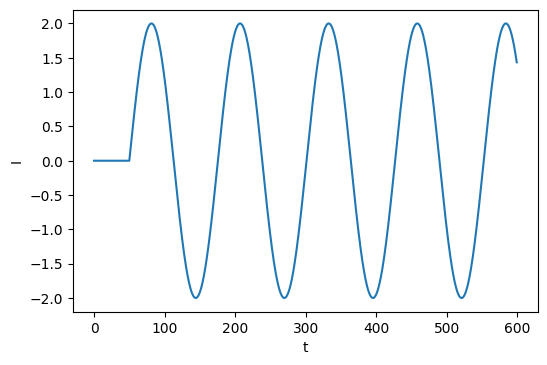

In [4]:
fig, ax = plt.subplots(dpi=100)
plt.ylabel('I')
plt.xlabel('t')
ax.plot(t,I_input.get_data("I",t,sol))

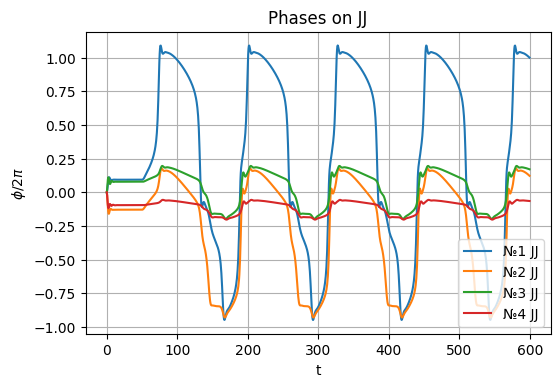

In [5]:
fig, ax = plt.subplots(dpi=100)

#ax.plot(t, JJ_1.get_data("V",t,sol)-2)
ax.plot(t,JJ_1.get_data("P",t,sol)/(2*np.pi))
ax.plot(t,JJ_2.get_data("P",t,sol)/(2*np.pi))
ax.plot(t,JJ_3.get_data("P",t,sol)/(2*np.pi))
ax.plot(t,JJ_4.get_data("P",t,sol)/(2*np.pi))
#ax.plot(t,JJ_3.get_data("P",t,sol))
#ax.plot(t, R_out.get_data("V",t,sol)-4)
#ax.plot(t,JJ_6.get_data("P",t,sol)-12)
#ax.plot(t,V_out)
#ax.plot(t,I_input.get_data("I",t,sol)/5)
ax.grid('on')
plt.xlabel('t')
plt.ylabel('$\phi / 2\pi$')
plt.title('Phases on JJ')
ax.legend(['№1 JJ','№2 JJ','№3 JJ','№4 JJ'], loc='lower right')

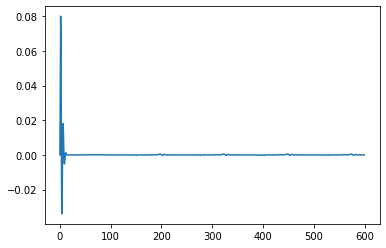

In [7]:
plt.plot(t,R_out.get_data("V",t,sol))

# HC-DRO cell

In [116]:
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.insert(0, r'C:\Users\Admin\Documents\before_github\SymSC_Python_Norm2')
from Objects import JJ, Sine_current, Pulses, L,Ib, Square_pulse, MutualInductance
from FunctionCompiler import *

Generated objects are: Pulses1 Pulses2 Pulses3 L1 L2 L3 L4 JJ1 JJ2 JJ3 Ib1 R1 Pulses4 Pulses5 Pulses6 Pulses7


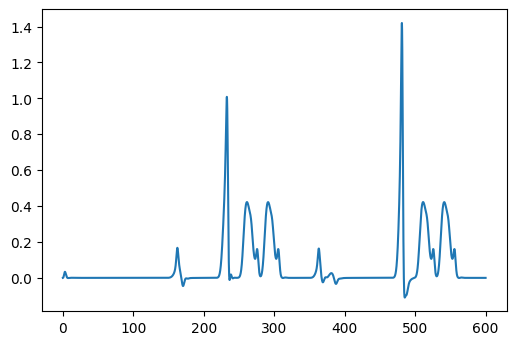

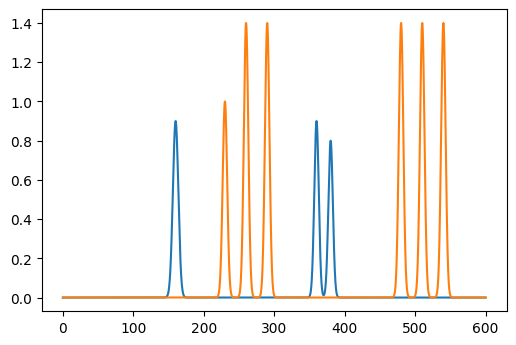

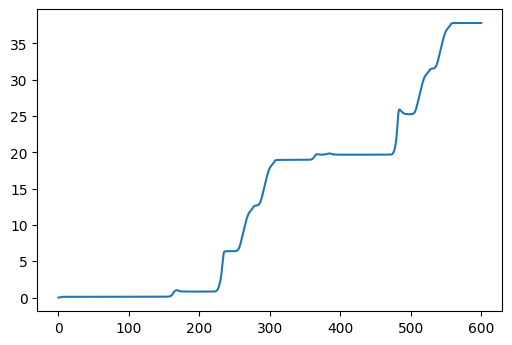

In [423]:
L1 = L.L(loc=[1,2],val=2.5)
L2 = L.L(loc=[2,3],val=11.667)
L3 = L.L(loc=[5,4],val=1.667)
L4 = L.L(loc=[3,6],val=1)

JJ1 = JJ.JJ(loc=[2,0],A=0.92, c=1)
JJ2 = JJ.JJ(loc=[3,0],A=0.68,c=1)
JJ3 = JJ.JJ(loc=[4,3],A=0.64,c=1)

Ib1 = Ib.Ib(loc=[2],val=0.8)
R_out = R.R(loc=[6,0],r=1)

val_input = 0.9
pulse_1 = Pulses.Pulses(loc=[1], A = val_input, t0 = 160,T=4000)

pulse_2 = Pulses.Pulses(loc=[1], A = val_input, t0 = 360,T=4000,D=10)
pulse_3 = Pulses.Pulses(loc=[1], A = val_input-0.1, t0 = 380,T=4000,D=10)

val = 1.4
pulse_clk_1 = Pulses.Pulses(loc=[5], A = val-0.4, t0 = 230,D=10)
pulse_clk_1_1 = Pulses.Pulses(loc=[5], A = val, t0 = 480,D=10)
pulse_clk_2 = Pulses.Pulses(loc=[5], A = val, t0 = 260,D=10,T=250)
pulse_clk_3 = Pulses.Pulses(loc=[5], A = val, t0 = 290,D=10,T=250)

t = np.arange(0, 600, 0.1)
fc = FunctionCompiler([ pulse_3, pulse_2,pulse_clk_1_1, L1, L2, L3, L4, JJ1, JJ2, JJ3, Ib1, R_out, pulse_1, pulse_clk_1, pulse_clk_2,pulse_clk_3],t)

sol = fc.solve()
#fc.object_dict

fig, ax = plt.subplots(dpi=100)
ax.plot(t,JJ2.get_data("V",t,sol))
fig, ax = plt.subplots(dpi=100)
ax.plot(t,pulse_1.get_data("I",t,sol)+pulse_2.get_data("I",t,sol)+pulse_3.get_data("I",t,sol))
ax.plot(t,pulse_clk_1.get_data("I",t,sol)+pulse_clk_1_1.get_data("I",t,sol)+pulse_clk_2.get_data("I",t,sol)+pulse_clk_3.get_data("I",t,sol))


fig, ax = plt.subplots(dpi=100)
ax.plot(t,JJ2.get_data("P",t,sol))

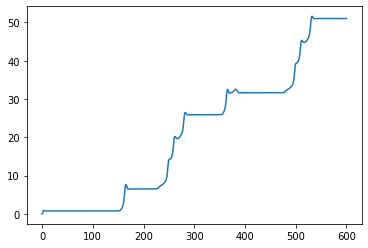

In [403]:
plt.plot(t,JJ1.get_data("P",t,sol))